## Model statistical distribution
- The purpose is to learn about well-known statistical distributions, empirical cummulative distribution and quantiles. Also, to gain knowledge about what kind of data to use specific theoretical distributions types with and how to sample from those distributions.

### Import libraries

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 11, repr.plot.height = 7) # set plot size

### Read data

In [3]:
bankData <- read.csv('~/Downloads/data-models/Lecture 7 - Model statistical distribution/bank-data.csv', sep = ';')
sData <- read_xlsx('~/Downloads/data-models/Lecture 7 - Model statistical distribution/M2_Superstore.xlsx', sheet = 1)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L2236 / R2236C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L5276 / R5276C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L8800 / R8800C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9148 / R9148C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9149 / R9149C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9150 / R9150C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9388 / R9388C12: '05408'”

### Empirical distribution
- Distribution derived from data is called empirical distribution

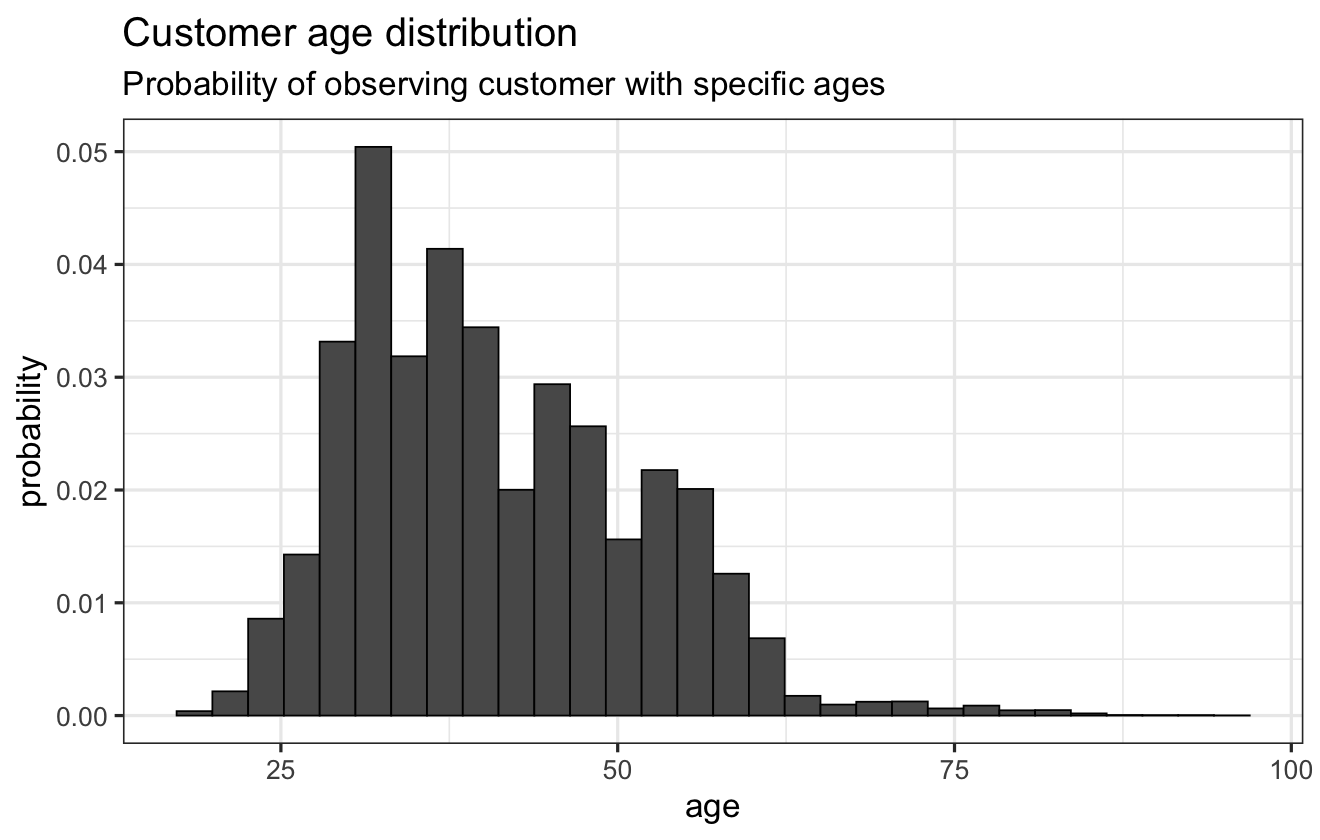

In [4]:
ggplot(bankData) +
geom_histogram(aes(x=age, y = ..density..), color = 'black', bins = 30) +
ylab('probability') +
ggtitle(
    'Customer age distribution', 
    subtitle = 'Probability of observing customer with specific ages'
) +
theme_bw(base_size = 20)

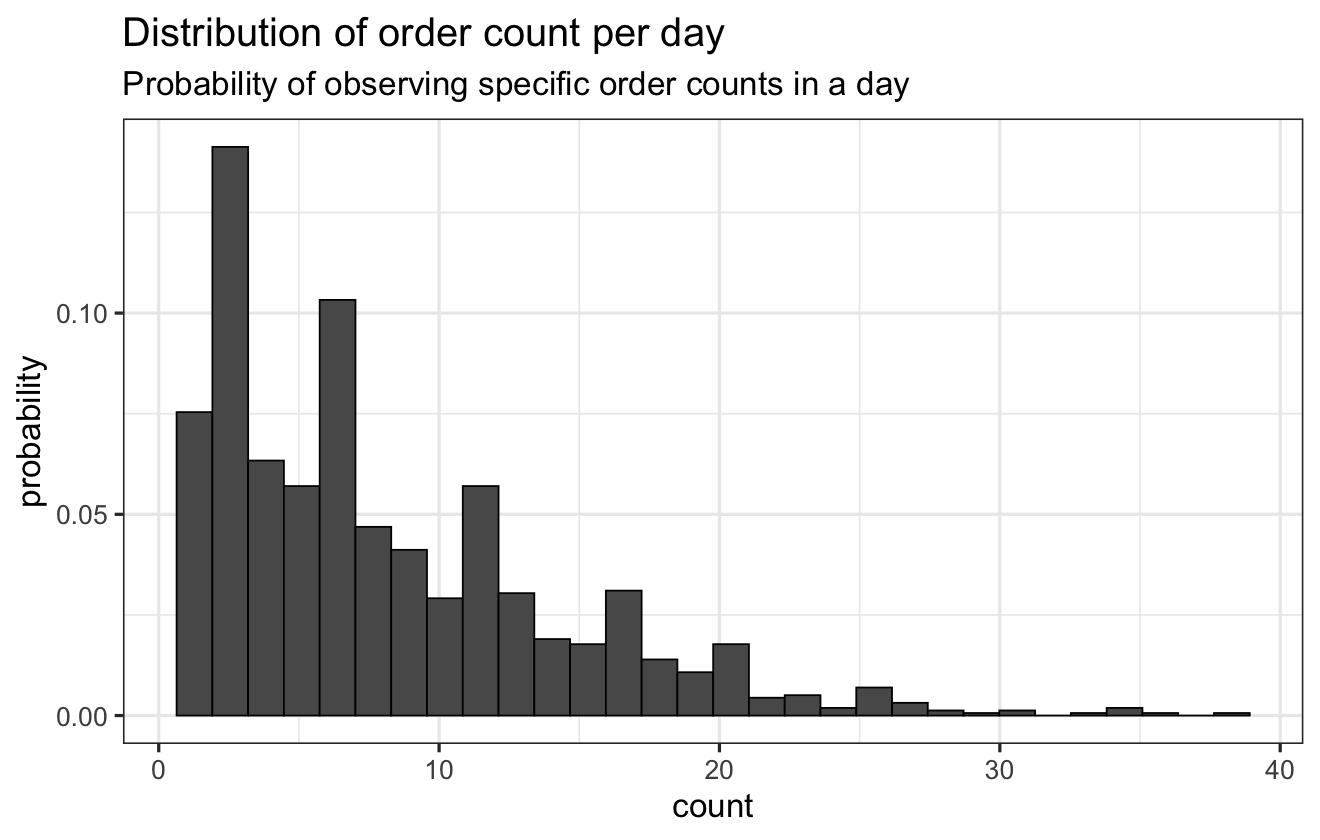

In [5]:
# count orders in a day
orderByDate <- sData %>% 
group_by(`Order Date`) %>% 
summarise(count = n())

ggplot(orderByDate) +
geom_histogram(aes(x = count, y = ..density..), color = 'black', bins = 30) +
ylab('probability') +
ggtitle(
    'Per day order count distribution', 
    subtitle = 'Probability of observing specific order counts in a day'
) +
ggtitle('Distribution of order count per day') +
theme_bw(base_size = 20)

### Theoretical distribution
- Distribution with predefined characteristics and parameters e.g. normal distribution, binomial distribution, poisson distribution, exponential distribution

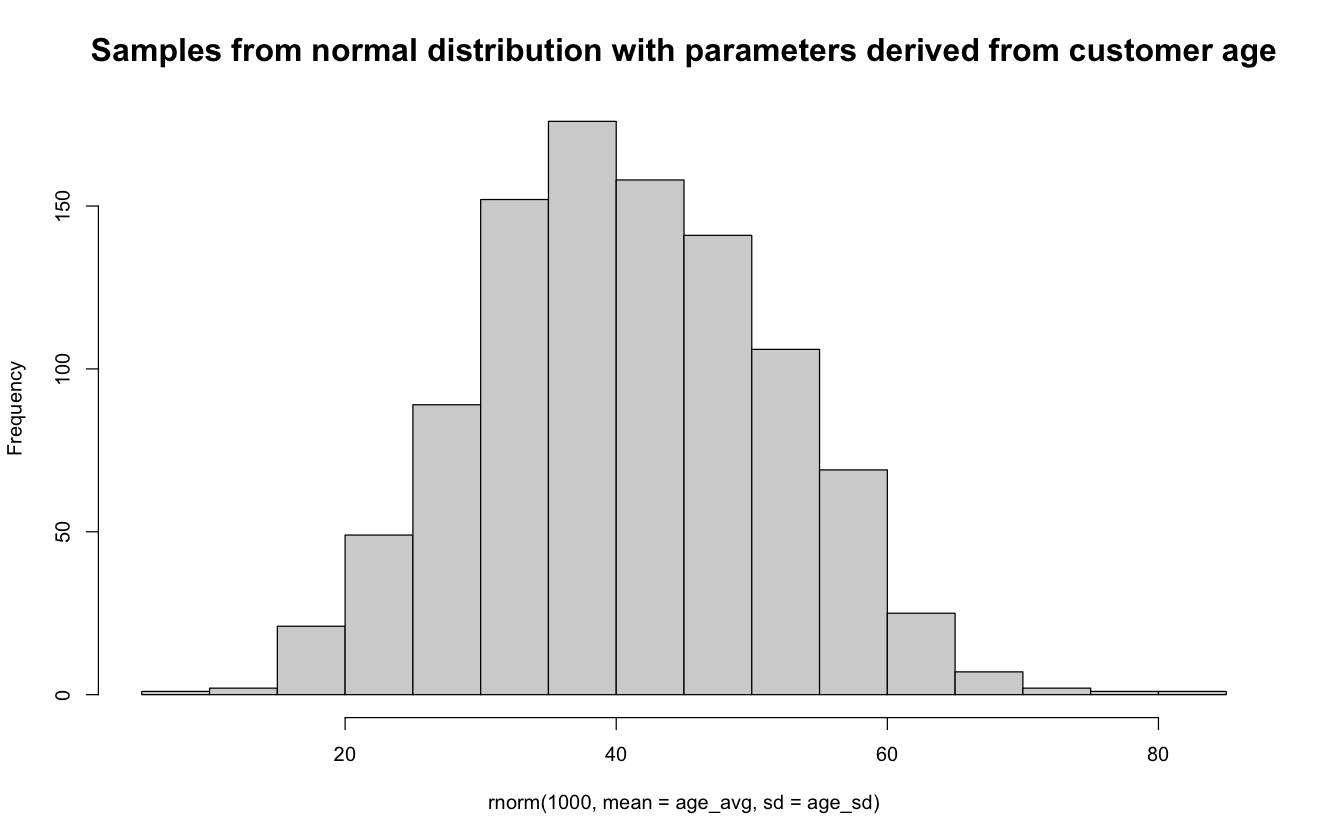

In [6]:
age_avg = mean(bankData$age)
age_sd = sd(bankData$age)
# sample from normal distribution with same mean and sd as customer age variable
hist(
    rnorm(1000, mean = age_avg, sd = age_sd), 
    main = 'Samples from normal distribution with parameters derived from customer age', 
    cex.main = 1.6
)

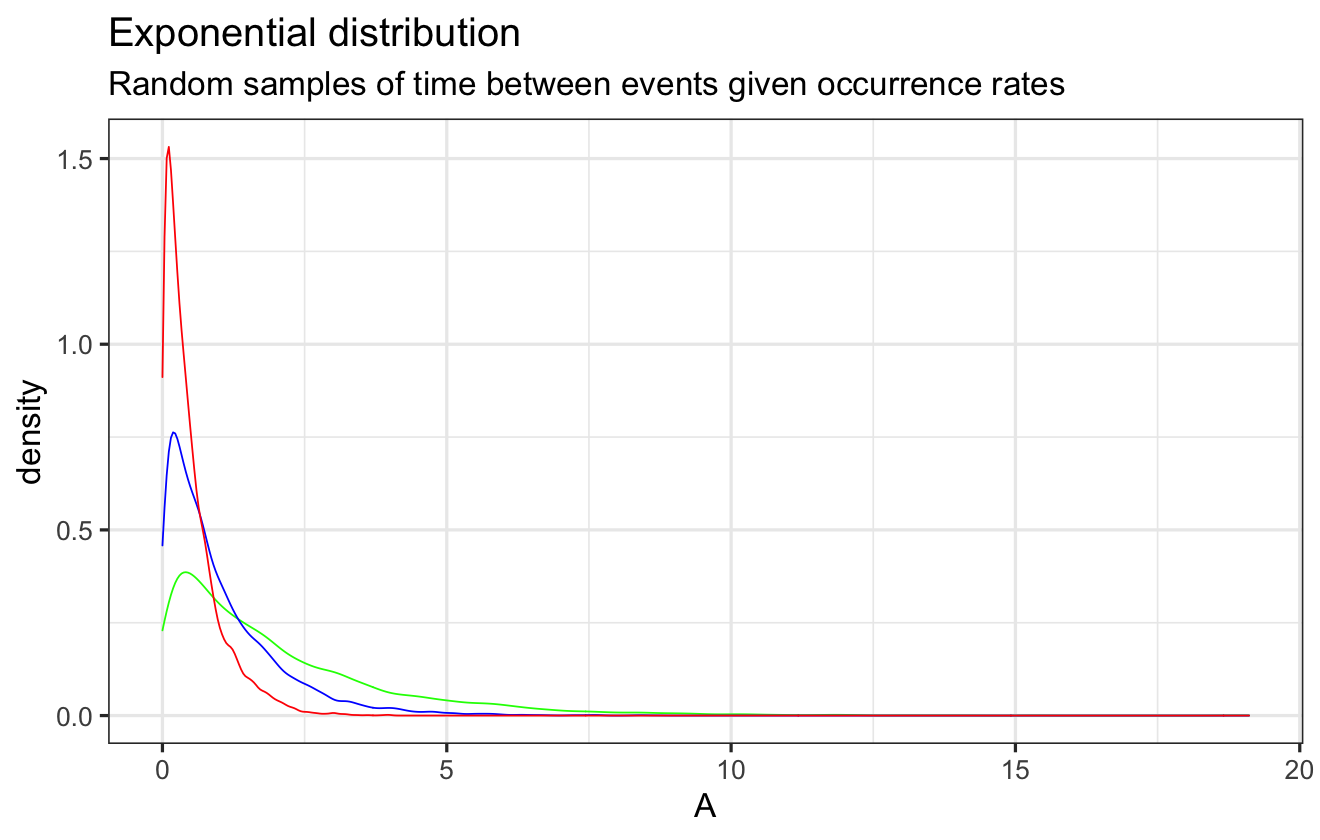

In [7]:
# sample from exponential distribution (model time between events)
x <- data.frame(A = rexp(10000, rate = 0.5), 
               B = rexp(10000, rate = 1), 
               C = rexp(10000, rate = 2))
ggplot(x) + 
geom_density(aes(x = A), color = 'green') + 
geom_density(aes(x = B),color = 'blue') + 
geom_density(aes(x = C),color = 'red') +
ggtitle('Exponential distribution', subtitle = 'Random samples of time between events given occurrence rates') +
theme_bw(base_size = 20)

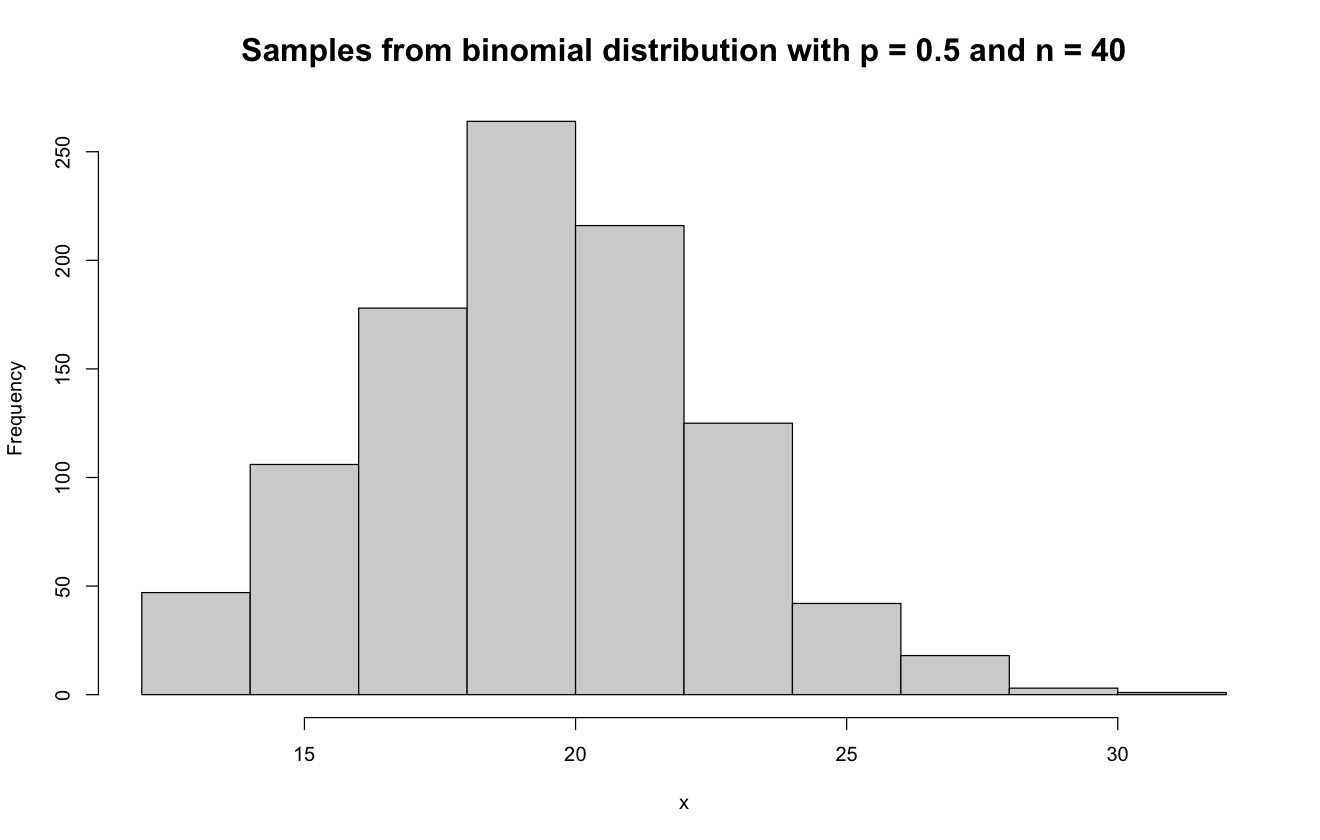

In [8]:
# generating count of success from binomial distribution with n = 40, p = 0.5
x <- NULL
for(i  in 1:1000) {
  x <- c(x, sum(ifelse(runif(40) > 0.5, 1, 0)))
}
hist(x, main = 'Samples from binomial distribution with p = 0.5 and n = 40', cex.main = 1.6)

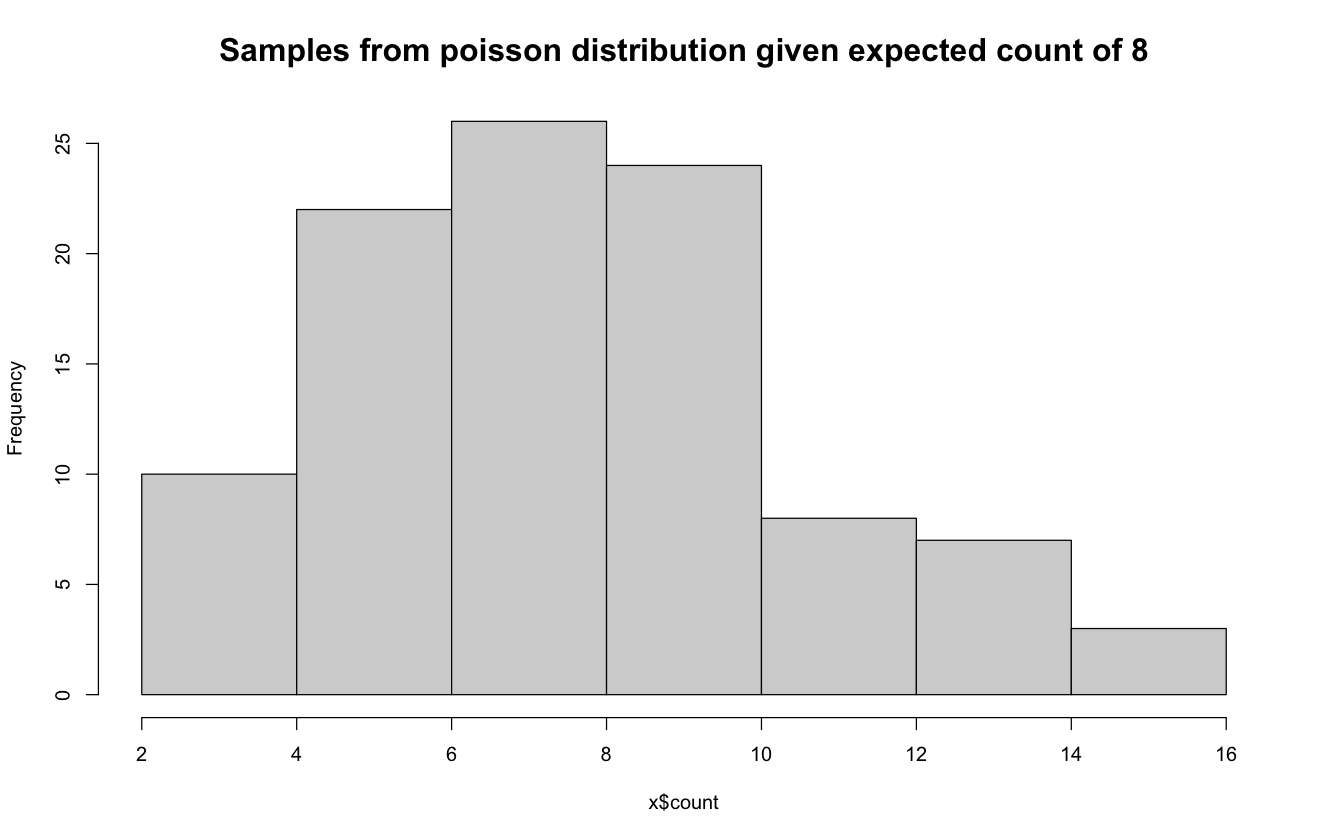

In [9]:
order_mean <- mean(orderByDate$count)
# sample from poisson distribution
x <- data.frame(count = rpois(100, lambda = 8)) # mean(orderByDate$count) = ~8

hist(x$count, main = 'Samples from poisson distribution given expected count of 8', cex.main = 1.6)

### Empirical cummulative distribution
- Cummulative distribution function at point x gives probability of observing values less than or equal to x

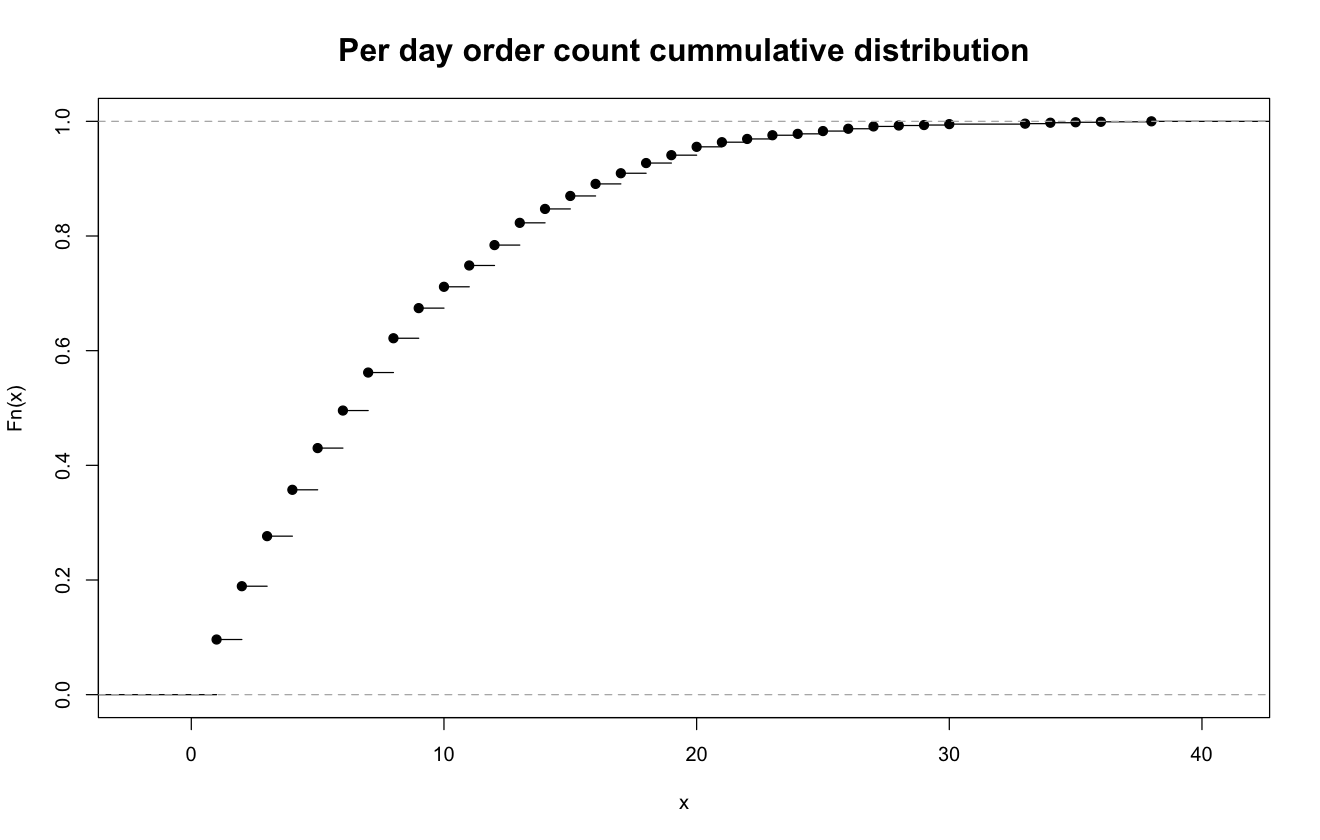

In [10]:
cdf <- ecdf(orderByDate$count)
plot(cdf, main = 'Per day order count cummulative distribution', cex.main = 1.6)

### Quantile
- Inverse of cummulative distribution function is quantile

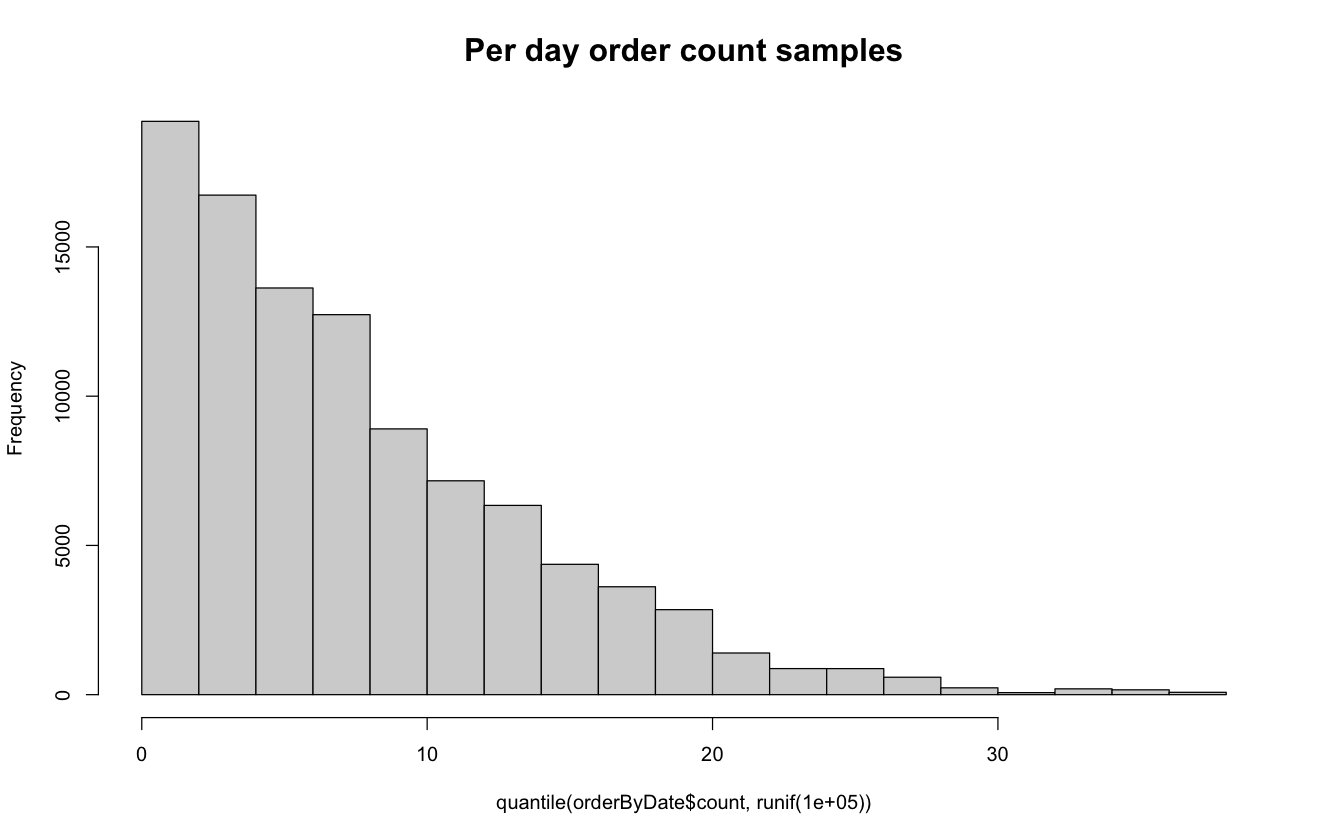

In [11]:
# sample order count
hist(quantile(orderByDate$count, runif(100000)), main = 'Per day order count samples', cex.main = 1.6)